<div align="right"><img src='images/zestimates.png'/>

<h1 style="color:#009eff;font:luminary;text-align:center;"><i>Predicting Zillow Zestimates </i></h1>
    
<h2 style="color:#009eff;text-align:center;"> Predicting errors on Zestimates - (presentation delivered November 18, 2022) </h2>

<h1 style="color:#009eff;">Task at hand</h1> 

### Using several data science methods detailed below, this project's purpose is to estimate the value that zillow should use for its zestimates based on the assumption that the yearly tax assessed value is an appropriate estimate for fair market value of a home.
#### Data Science Methods include:
- splitting model into appropriate groups when recognizing their existence
- regression modeling using several regression types


<h1 style="color:#009eff;">Project Goal</h1> 

### Zillow produces a publicly accessible set of values for houses which are on the market, were previously (recently) on the market, or may be on the market for potential buyers. This service is provided for free for public users while real estate professional may purchase additional services regarding homes that may be sold. As such, this home value estimate is important for Zillow to produce quickly and accurately. This project attempts to act like Zillow and provide home value estimates for homes in the LA county region from 2017 using archived information about their characteristics. Our target to guess based on training our model is the annual tax assesssed value of each home in the sample we are working with. 

In [4]:
import src.put_it_together as pit
import src.wrangle as wr
import src.evaluate as ev

NameError: name 'wr' is not defined

In [3]:
simple_df = wr.zillow_2017()
complex_df = wr.zillow_2017(simple=False)

## Data Dictionary


| Feature | Definition | Manipulations applied|Data Type|
|--------|-----------|-----------|-----------|
||
|||**Categorical Data**
||
|*fips*| Identifying Regions: counties and LA city proper  | Used fips and city ID to determine 'LA', 'Orange', 'Ventura' counties | category
|||**Numerical Data**
||
|*bedrooms*|  Number of bedrooms | Changed the type into integer| integer
|*baths*|  Number of bathrooms | Half-bathrooms were turned into whole number, changed the type intoto integer| integer
|*lot_size*| Size of the plot of land the house sits on | Changed the type into integer| integer
|*age*| Age of the house | Created the column by subtracting the year_built from 2017| integer
|*tax_amount*| The home value assessed by the tax collection authority | integer
|*garage_sqft*| Size of the garage with the property | Changed the type into integer| integer
||
|||**Target Data**
||
|**tax_value** | **Proxy for the home's value to potential buyers** | **** | **float**

## First thing, first. Cleaning our data. 
- We removed outliers that ended up contributing to about 11% of the sample. Usually, we don't think of 11% of a population as being outliers. In this case however, we want to predict house prices that actual customers for houses will be looking to purchase.
- As such, we eliminated houses with certain features including:
1. More than 5 bedrooms or 1 bedroom
2. 5 or more bathrooms
3. more than 6,000 square feet
4. lot sizes which are smaller than 750 square feet
5. houses which are older than a century 

- While a few of our important variables do not look "pretty", I think they are much more workable than what we began with.

## Furthermore, from the beginning I wanted to carry a comparison between two different sets of features for our modeling. 
- I wanted to see just how profoundly some of these features play off each other and influence our ability to predict home values.
- Those feature sets will be identified as the complex model and the simple model, the difference being that the complex model has more variables.

1. The simple model contains four features: bedrooms, baths, sqaure feet of the house, and fips (county information)

2. The complex model contains the following features: bedrooms, bathrooms - but including half bathrooms, lot size, square feet of the house, size of the lot, and year the home was built. 


### After all our cleaning was completed, we were left with 48,223 properties

### Taking a look at the data after we alter it due to our outlier detection methods showing us glaring problems.

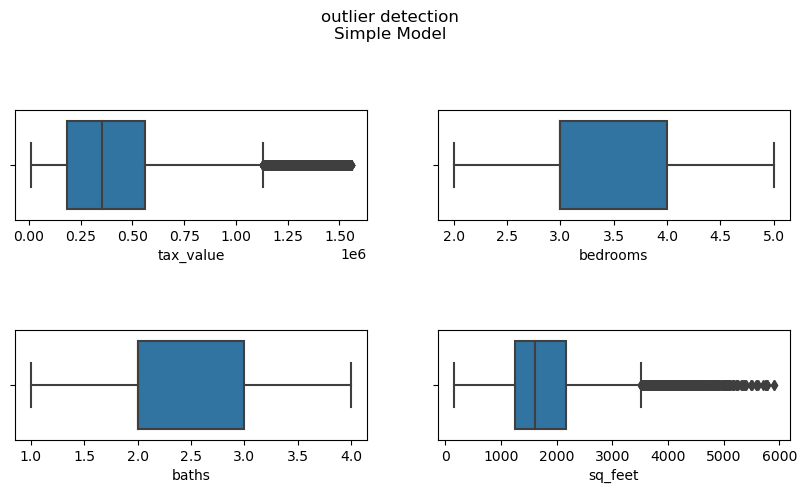

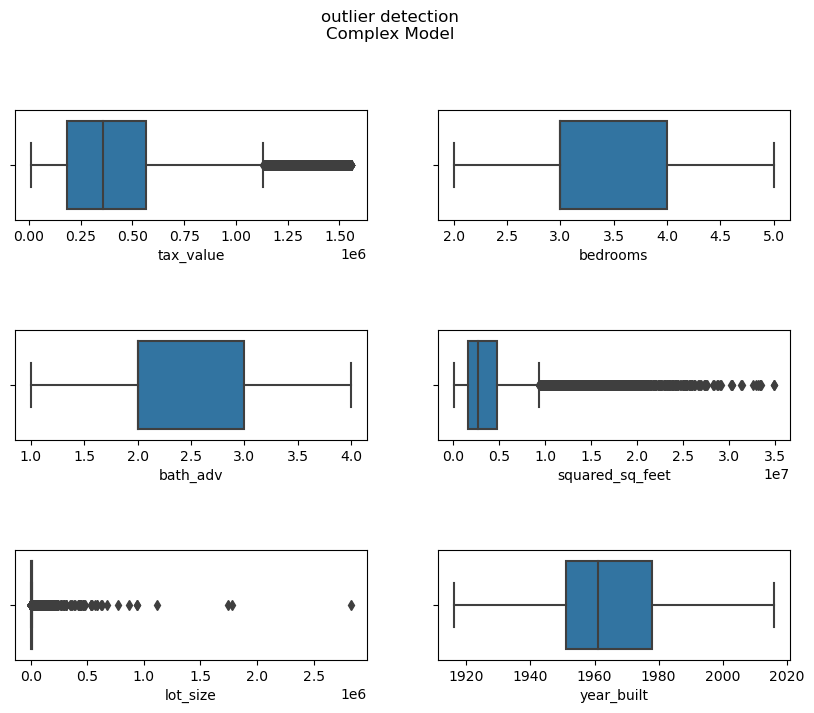

In [4]:
pit.explore_simple(simple_df)
pit.explore_complex(complex_df)

## Exploring our features' correlation with the target variable - "tax_value"

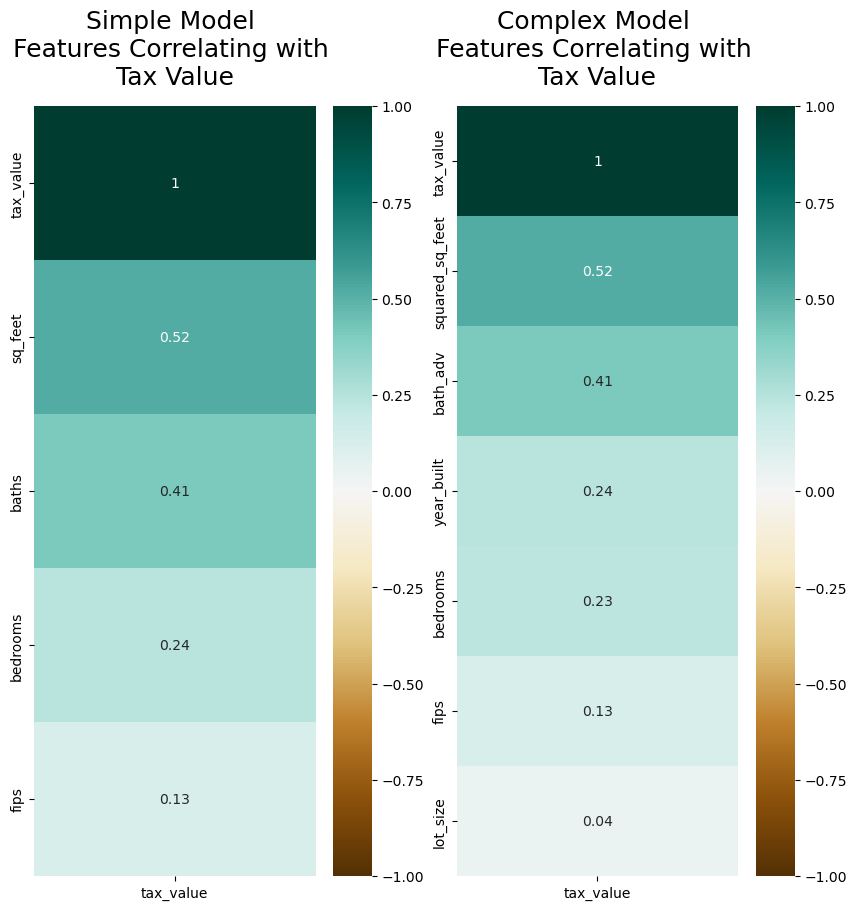

In [5]:
pit.correlate_viz(simple_df, complex_df, 'tax_value')

## Another look at correlation between our model features and our target variable, 'tax_value':

In [6]:
for columns in simple_df:
    pit.spearman_test(simple_df, 'tax_value', columns)

Correlation Coefficient of tax_value: 1.0
P-value: 0.0
Correlation Coefficient of bedrooms: 0.23511162572316666
P-value: 0.0
Correlation Coefficient of baths: 0.3834502264988395
P-value: 0.0
Correlation Coefficient of sq_feet: 0.4624276954175
P-value: 0.0
Correlation Coefficient of fips: 0.20396734142007358
P-value: 0.0


In [7]:
for columns in complex_df:
    pit.spearman_test(complex_df, 'tax_value', columns)

Correlation Coefficient of tax_value: 0.9999999999999999
P-value: 0.0
Correlation Coefficient of bedrooms: 0.23249306736232603
P-value: 0.0
Correlation Coefficient of bath_adv: 0.3813664541506116
P-value: 0.0
Correlation Coefficient of lot_size: 0.08513427754529487
P-value: 2.806026633204847e-76
Correlation Coefficient of year_built: 0.25456372889091805
P-value: 0.0
Correlation Coefficient of fips: 0.20573996455260354
P-value: 0.0
Correlation Coefficient of squared_sq_feet: 0.4631474977846935
P-value: 0.0


### I had a suspicion that we could not effectively handle the data sets as 1 individual model because the samples would diverge around location. So, I investigated that suspicion and found that each county had unique features and distributions of property values. 

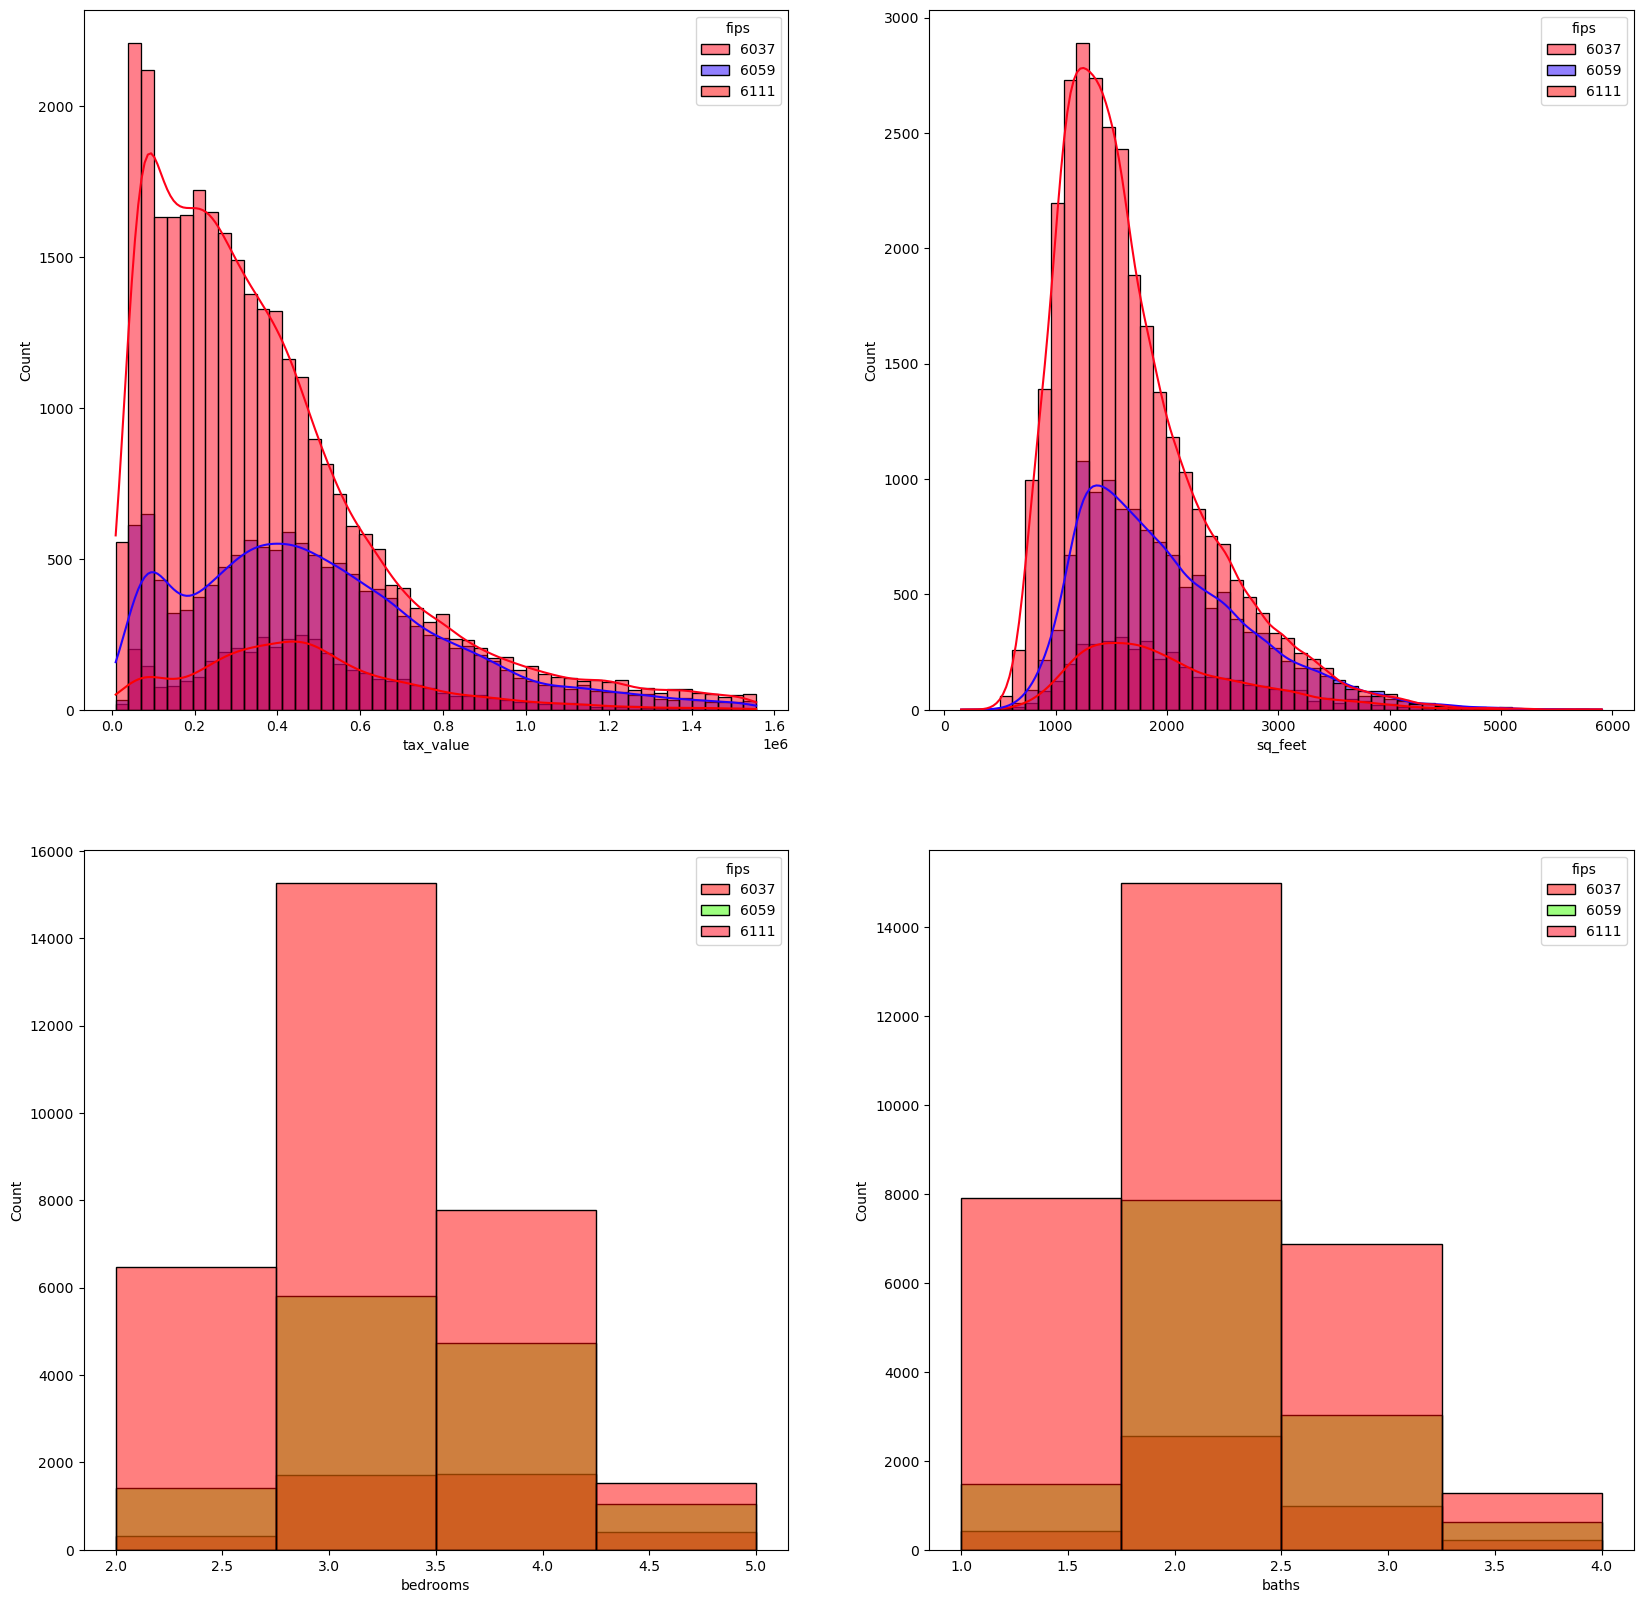

In [8]:
pit.fips_viz(simple_df)

In [9]:
compare_df = pit.simple_regression_workhorse(simple_df)

In [10]:
final_comparison_df = pit.complex_regression_workhorse(complex_df, compare_df)

## 

In [11]:
final_comparison_df

,ESS,SSE,TSS,MSE,RMSE,R^2,AdjR^2
Model,,,,,,,
target,2.441743e+15,0.000000e+00,2.441743e+15,0.000000e+00,0.000,1.000,1.000
baseline_mean,2.264568e+03,2.441743e+15,2.441743e+15,9.042154e+10,300701.739,-0.000,-0.000
baseline_median,9.626497e+13,2.538008e+15,2.634273e+15,9.398638e+10,306571.977,-0.039,-0.040
simple_model,7.023678e+14,1.739375e+15,2.441743e+15,6.441177e+10,253794.736,0.288,0.288
la_simple_model,2.965921e+14,1.147224e+15,1.443816e+15,6.600069e+10,256905.990,0.205,0.205
or_simple_model,2.657023e+14,4.420235e+14,7.077258e+14,6.067584e+10,246324.656,0.375,0.375
vent_simple_model,8.005780e+13,8.767307e+13,1.677309e+14,3.754735e+10,193771.398,0.477,0.476
la_complex_model,3.240460e+14,1.105538e+15,1.429584e+15,6.592746e+10,256763.434,0.227,0.226
or_complex_model,2.953106e+14,4.111084e+14,7.064191e+14,5.696389e+10,238671.098,0.418,0.418


## How does the simplest model perform? 

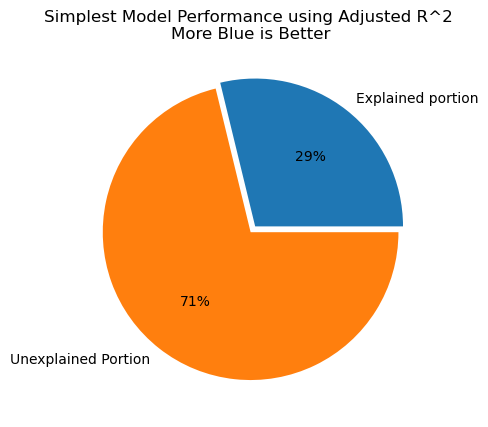

In [12]:
pit.pie_chart1(compare_df)

### It is pretty abysmal. Only 29% of the variation in our proxy variable for house selling prices, tax_value, can be explained by our model's features.

## Testing our best model(s) on out of sample data

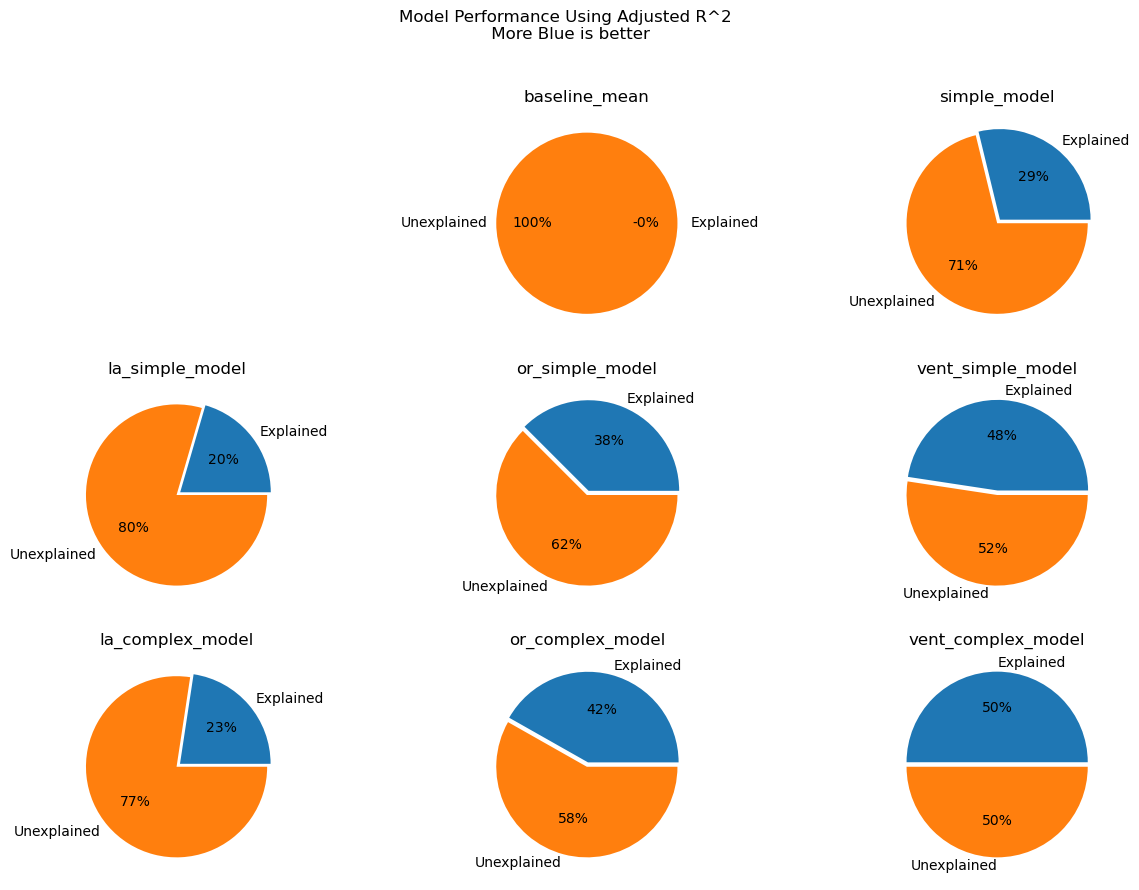

In [13]:
pit.overload_pies(final_comparison_df)

In [14]:
final = pit.test_model(complex_df, simple_df)

In [15]:
final

,ESS,SSE,TSS,MSE,RMSE,R^2,AdjR^2
Model,,,,,,,
target,2.428813e+15,0.000000e+00,2.428813e+15,0.000000e+00,0.000,1.000,1.000
baseline_mean,1.664346e+04,2.428813e+15,2.428813e+15,8.994270e+10,299904.491,-0.000,-0.000
baseline_median,9.664099e+13,2.525454e+15,2.622095e+15,9.352147e+10,305812.801,-0.040,-0.040
simple_model,6.969221e+14,1.731891e+15,2.428813e+15,6.413460e+10,253248.092,0.287,0.287
la_complex_model,1.155605e+14,3.821920e+14,4.977525e+14,6.381567e+10,252617.633,0.232,0.231
or_complex_model,9.973219e+13,1.545821e+14,2.543143e+14,5.996202e+10,244871.428,0.392,0.391
vent_complex_model,2.725228e+13,3.333298e+13,6.058525e+13,4.030590e+10,200763.289,0.450,0.446


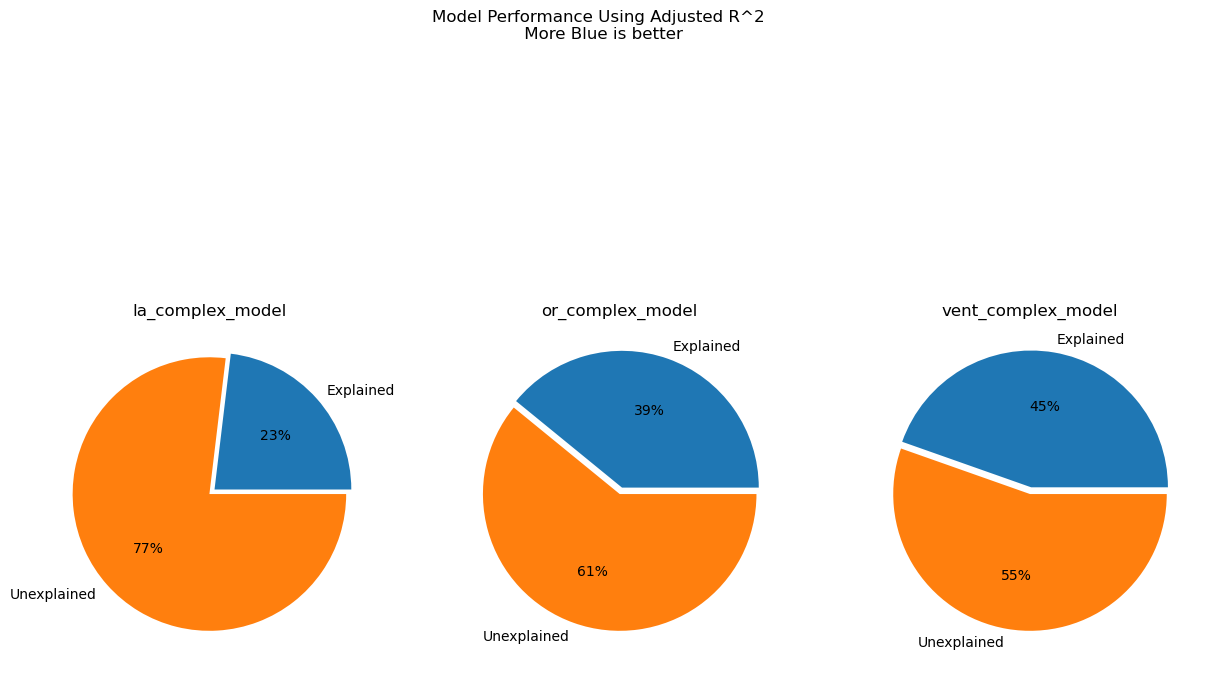

In [16]:
pit.final_pies(final)

# Final Takeaway

- Our models are not good - as expected. 
- I'm not sure that it is possible to effectively predict tax assessed value beyond using the previous year's value
- Tax Assessed Value is probably not even a good proxy for sales prices for homes.
- Too many subjective measures are included, such as tax assessor's biases, the buyer's biases, whatever exemptions were filed and when they were filed for and other convoluting factors
- 